In [2]:
ls ~/Downloads | grep titanic

titanic/
titanic 2/
titanic.zip


In [6]:
ls '~/Downloads/titanic 2'

ls: ~/Downloads/titanic 2: No such file or directory


In [9]:
import pandas as pd 
train_df =pd.read_csv('~/Downloads/titanic 2/train.csv')

In [10]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_df.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [14]:
train_df['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [16]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
class NaivePredictor(BaseEstimator):
    def fit(self, X, y=None):
        self
        
    def predict(self, X, y=None):
        return [0] * len(X)

In [26]:
naive_predictor = NaivePredictor()
naive_predictor.fit(train_df)
naive_preds = naive_predictor.predict(train_df)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score( train_df['Survived'] , naive_preds)

0.6161616161616161

In [28]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1faf45f8>,
      dtype=object)

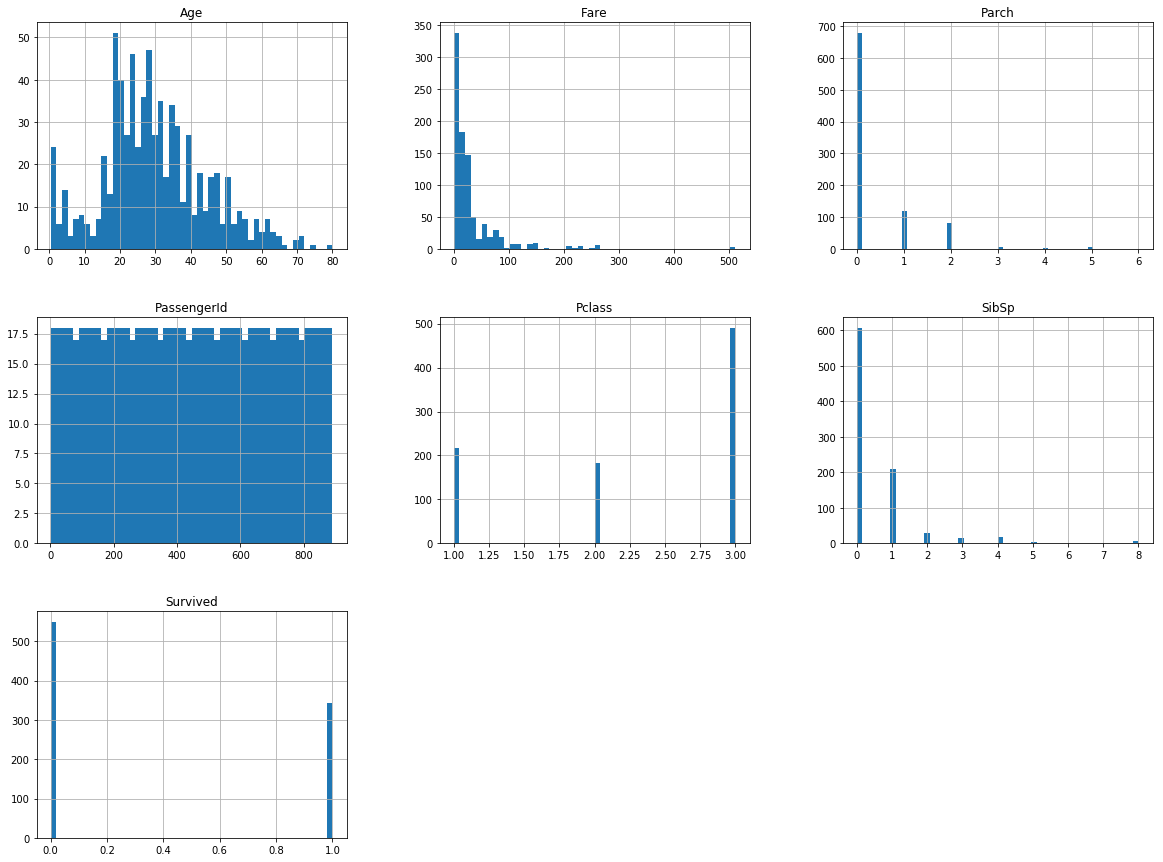

In [33]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
train_df.hist(bins=50, figsize=(20,15))

In [35]:

# train_df.plot(kind='scatter', x='Sex', y='Survived')

In [36]:
train_df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [39]:

class AttribPicker(BaseEstimator, TransformerMixin):
    def __init__(self, required_cols):
        self.required_cols=required_cols
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.required_cols]

In [40]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [41]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [42]:
num_attribute=['Age','SibSp', 'Parch','Fare']
cat_attribute=['Pclass','Sex','Embarked']

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

In [47]:
num_pipeline = Pipeline([
    ('selector',AttribPicker(num_attribute)),
    ('imputer', Imputer(strategy='median'))
])

In [124]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

class PdOneHotEncoder(BaseEstimator,TransformerMixin):
    
    def __init__(self):
        self.label_encoder = LabelEncoder()
        self.one_hot_encoder = OneHotEncoder()
        
    def fit(self, X, y=None ):
        return self
    
    def transform(self,X, y=None):
        for col in X.columns:
            X[col] = X[col].astype('category')
            
        encoded_X=pd.get_dummies(X)
        self.classes_=encoded_X.columns.tolist()
        return encoded_X.values

In [125]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.column_imputer={}
        
    def fit(self, X, y=None):
        for col in X.columns:
            self.column_imputer[col] =X[col].value_counts().sort_values().index[-1]
        return self
            
    def transform(self, X, y=None):
        for col in self.column_imputer.keys():
            if col in X.columns:X[col].fillna(self.column_imputer[col], inplace=True)
        return X
                
    
        

In [126]:
cat_pipeline = Pipeline([
    ('selector', AttribPicker(cat_attribute)),
    ('most_freq_imputer', MostFrequentImputer()),
    ('one_hot_encoder' , PdOneHotEncoder())
])

In [127]:
from sklearn.pipeline import FeatureUnion


In [128]:
full_pipeline = FeatureUnion(transformer_list=[
    ('num', num_pipeline),
    ('cat', cat_pipeline)
])

In [129]:
num_pipeline.fit_transform(train_df)

array([[22.    ,  1.    ,  0.    ,  7.25  ],
       [38.    ,  1.    ,  0.    , 71.2833],
       [26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [28.    ,  1.    ,  2.    , 23.45  ],
       [26.    ,  0.    ,  0.    , 30.    ],
       [32.    ,  0.    ,  0.    ,  7.75  ]])

In [130]:
cat_pipeline.fit_transform(train_df)

/Users/Kunal/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/Kunal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[0, 0, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 1, 0]], dtype=uint8)

In [131]:
cat_pipeline.classes_

['Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [133]:
train_df_prepared = full_pipeline.fit_transform(train_df)

/Users/Kunal/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/Kunal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [139]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [142]:
y_train=train_df['Survived']

In [159]:

lr_clf=LogisticRegression()
lr_scores = cross_val_score(lr_clf,train_df_prepared, y_train,cv=10)


In [160]:
lr_scores.mean()

0.7991973101804561

In [161]:
forest_clf = RandomForestClassifier()
forest_scores = cross_val_score(forest_clf,train_df_prepared, y_train,cv=10)

In [162]:
forest_scores.mean()

0.8070621949835433

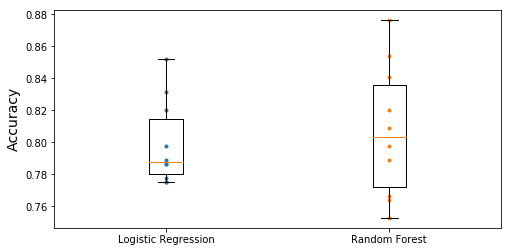

In [164]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, lr_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([lr_scores, forest_scores], labels=("Logistic Regression","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

In [165]:
train_df_prepared.shape

(891, 12)

In [171]:
[i for i in range(100,1001,25)]

[100,
 125,
 150,
 175,
 200,
 225,
 250,
 275,
 300,
 325,
 350,
 375,
 400,
 425,
 450,
 475,
 500,
 525,
 550,
 575,
 600,
 625,
 650,
 675,
 700,
 725,
 750,
 775,
 800,
 825,
 850,
 875,
 900,
 925,
 950,
 975,
 1000]

In [177]:
from sklearn.model_selection import GridSearchCV
params = [{
    'max_features' : [ i for i in range(4, 10)], 'n_estimators' : [i for i in range(100,1001,25)]
}]
grid_search=GridSearchCV(forest_clf,params, cv=3, n_jobs=-1, verbose=2)

In [178]:
grid_search.fit(train_df_prepared, y_train)

Fitting 3 folds for each of 222 candidates, totalling 666 fits
[CV] max_features=4, n_estimators=100 ................................
[CV] max_features=4, n_estimators=100 ................................
[CV] max_features=4, n_estimators=100 ................................
[CV] max_features=4, n_estimators=125 ................................
[CV] ................. max_features=4, n_estimators=100, total=   0.4s
[CV] ................. max_features=4, n_estimators=100, total=   0.5s
[CV] max_features=4, n_estimators=125 ................................
[CV] max_features=4, n_estimators=125 ................................
[CV] ................. max_features=4, n_estimators=100, total=   0.4s
[CV] max_features=4, n_estimators=150 ................................
[CV] ................. max_features=4, n_estimators=125, total=   0.6s
[CV] max_features=4, n_estimators=150 ................................
[CV] ................. max_features=4, n_estimators=125, total=   0.7s
[CV] max_featu

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.0s


[CV] ................. max_features=4, n_estimators=375, total=   2.0s
[CV] max_features=4, n_estimators=400 ................................
[CV] ................. max_features=4, n_estimators=375, total=   2.0s
[CV] max_features=4, n_estimators=400 ................................
[CV] ................. max_features=4, n_estimators=375, total=   1.8s
[CV] max_features=4, n_estimators=425 ................................
[CV] ................. max_features=4, n_estimators=400, total=   1.8s
[CV] max_features=4, n_estimators=425 ................................
[CV] ................. max_features=4, n_estimators=400, total=   1.7s
[CV] max_features=4, n_estimators=425 ................................
[CV] ................. max_features=4, n_estimators=400, total=   1.7s
[CV] max_features=4, n_estimators=450 ................................
[CV] ................. max_features=4, n_estimators=425, total=   1.8s
[CV] max_features=4, n_estimators=450 ................................
[CV] .

[CV] ................. max_features=4, n_estimators=850, total=   4.5s
[CV] max_features=4, n_estimators=875 ................................
[CV] ................. max_features=4, n_estimators=850, total=   4.6s
[CV] max_features=4, n_estimators=900 ................................
[CV] ................. max_features=4, n_estimators=875, total=   4.9s
[CV] max_features=4, n_estimators=900 ................................
[CV] ................. max_features=4, n_estimators=875, total=   4.7s
[CV] max_features=4, n_estimators=900 ................................
[CV] ................. max_features=4, n_estimators=875, total=   4.7s
[CV] max_features=4, n_estimators=925 ................................
[CV] ................. max_features=4, n_estimators=900, total=   4.8s
[CV] max_features=4, n_estimators=925 ................................
[CV] ................. max_features=4, n_estimators=900, total=   4.7s
[CV] max_features=4, n_estimators=925 ................................
[CV] .

[CV] ................. max_features=5, n_estimators=400, total=   2.4s
[CV] max_features=5, n_estimators=450 ................................
[CV] ................. max_features=5, n_estimators=425, total=   2.5s
[CV] max_features=5, n_estimators=450 ................................
[CV] ................. max_features=5, n_estimators=425, total=   2.4s
[CV] max_features=5, n_estimators=450 ................................
[CV] ................. max_features=5, n_estimators=425, total=   2.3s
[CV] max_features=5, n_estimators=475 ................................
[CV] ................. max_features=5, n_estimators=450, total=   2.5s
[CV] max_features=5, n_estimators=475 ................................


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min


[CV] ................. max_features=5, n_estimators=450, total=   2.5s
[CV] max_features=5, n_estimators=475 ................................
[CV] ................. max_features=5, n_estimators=450, total=   2.6s
[CV] max_features=5, n_estimators=500 ................................
[CV] ................. max_features=5, n_estimators=475, total=   2.7s
[CV] max_features=5, n_estimators=500 ................................
[CV] ................. max_features=5, n_estimators=475, total=   2.5s
[CV] max_features=5, n_estimators=500 ................................
[CV] ................. max_features=5, n_estimators=475, total=   2.3s
[CV] max_features=5, n_estimators=525 ................................
[CV] ................. max_features=5, n_estimators=500, total=   2.3s
[CV] max_features=5, n_estimators=525 ................................
[CV] ................. max_features=5, n_estimators=500, total=   2.4s
[CV] max_features=5, n_estimators=525 ................................
[CV] .

[CV] ................. max_features=5, n_estimators=925, total=   5.5s
[CV] max_features=5, n_estimators=975 ................................
[CV] ................. max_features=5, n_estimators=950, total=   5.5s
[CV] max_features=5, n_estimators=975 ................................
[CV] ................. max_features=5, n_estimators=950, total=   5.3s
[CV] max_features=5, n_estimators=975 ................................
[CV] ................. max_features=5, n_estimators=950, total=   5.5s
[CV] max_features=5, n_estimators=1000 ...............................
[CV] ................. max_features=5, n_estimators=975, total=   5.5s
[CV] max_features=5, n_estimators=1000 ...............................
[CV] ................. max_features=5, n_estimators=975, total=   5.9s
[CV] max_features=5, n_estimators=1000 ...............................
[CV] ................. max_features=5, n_estimators=975, total=   5.8s
[CV] max_features=6, n_estimators=100 ................................
[CV] .

[CV] ................. max_features=6, n_estimators=500, total=   2.7s
[CV] max_features=6, n_estimators=525 ................................
[CV] ................. max_features=6, n_estimators=500, total=   2.8s
[CV] max_features=6, n_estimators=525 ................................
[CV] ................. max_features=6, n_estimators=500, total=   2.8s
[CV] max_features=6, n_estimators=550 ................................
[CV] ................. max_features=6, n_estimators=525, total=   3.0s
[CV] max_features=6, n_estimators=550 ................................
[CV] ................. max_features=6, n_estimators=525, total=   3.0s
[CV] max_features=6, n_estimators=550 ................................
[CV] ................. max_features=6, n_estimators=525, total=   3.0s
[CV] max_features=6, n_estimators=575 ................................
[CV] ................. max_features=6, n_estimators=550, total=   3.1s
[CV] max_features=6, n_estimators=575 ................................
[CV] .

[CV] ................. max_features=6, n_estimators=975, total=   6.8s
[CV] max_features=6, n_estimators=1000 ...............................
[CV] ................. max_features=6, n_estimators=975, total=   5.5s
[CV] max_features=7, n_estimators=100 ................................
[CV] ................. max_features=7, n_estimators=100, total=   0.5s
[CV] max_features=7, n_estimators=100 ................................
[CV] ................. max_features=7, n_estimators=100, total=   0.6s
[CV] max_features=7, n_estimators=100 ................................
[CV] ................ max_features=6, n_estimators=1000, total=   5.3s
[CV] max_features=7, n_estimators=125 ................................
[CV] ................. max_features=7, n_estimators=100, total=   0.6s
[CV] max_features=7, n_estimators=125 ................................
[CV] ................. max_features=7, n_estimators=125, total=   0.8s
[CV] max_features=7, n_estimators=125 ................................
[CV] .

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.7min


[CV] ................. max_features=7, n_estimators=300, total=   1.7s
[CV] max_features=7, n_estimators=325 ................................
[CV] ................. max_features=7, n_estimators=300, total=   1.7s
[CV] max_features=7, n_estimators=325 ................................
[CV] ................. max_features=7, n_estimators=300, total=   1.7s
[CV] max_features=7, n_estimators=350 ................................
[CV] ................. max_features=7, n_estimators=325, total=   1.8s
[CV] max_features=7, n_estimators=350 ................................
[CV] ................. max_features=7, n_estimators=325, total=   1.9s
[CV] max_features=7, n_estimators=350 ................................
[CV] ................. max_features=7, n_estimators=325, total=   1.9s
[CV] max_features=7, n_estimators=375 ................................
[CV] ................. max_features=7, n_estimators=350, total=   2.0s
[CV] max_features=7, n_estimators=375 ................................
[CV] .

[CV] ................. max_features=7, n_estimators=775, total=   4.0s
[CV] max_features=7, n_estimators=800 ................................
[CV] ................. max_features=7, n_estimators=775, total=   3.9s
[CV] max_features=7, n_estimators=825 ................................
[CV] ................. max_features=7, n_estimators=800, total=   3.9s
[CV] max_features=7, n_estimators=825 ................................
[CV] ................. max_features=7, n_estimators=800, total=   4.5s
[CV] max_features=7, n_estimators=825 ................................
[CV] ................. max_features=7, n_estimators=800, total=   4.8s
[CV] max_features=7, n_estimators=850 ................................
[CV] ................. max_features=7, n_estimators=825, total=   5.0s
[CV] max_features=7, n_estimators=850 ................................
[CV] ................. max_features=7, n_estimators=825, total=   4.7s
[CV] max_features=7, n_estimators=850 ................................
[CV] .

[CV] ................. max_features=8, n_estimators=325, total=   1.9s
[CV] max_features=8, n_estimators=375 ................................
[CV] ................. max_features=8, n_estimators=350, total=   2.0s
[CV] max_features=8, n_estimators=375 ................................
[CV] ................. max_features=8, n_estimators=350, total=   2.1s
[CV] max_features=8, n_estimators=375 ................................
[CV] ................. max_features=8, n_estimators=350, total=   1.9s
[CV] max_features=8, n_estimators=400 ................................
[CV] ................. max_features=8, n_estimators=375, total=   2.2s
[CV] max_features=8, n_estimators=400 ................................
[CV] ................. max_features=8, n_estimators=375, total=   2.2s
[CV] max_features=8, n_estimators=400 ................................
[CV] ................. max_features=8, n_estimators=375, total=   2.2s
[CV] max_features=8, n_estimators=425 ................................
[CV] .

[CV] ................. max_features=8, n_estimators=825, total=   5.6s
[CV] max_features=8, n_estimators=850 ................................
[CV] ................. max_features=8, n_estimators=825, total=   5.5s
[CV] max_features=8, n_estimators=850 ................................
[CV] ................. max_features=8, n_estimators=825, total=   5.9s
[CV] max_features=8, n_estimators=875 ................................
[CV] ................. max_features=8, n_estimators=850, total=   5.8s
[CV] max_features=8, n_estimators=875 ................................
[CV] ................. max_features=8, n_estimators=850, total=   6.2s
[CV] max_features=8, n_estimators=875 ................................
[CV] ................. max_features=8, n_estimators=850, total=   5.9s
[CV] max_features=8, n_estimators=900 ................................
[CV] ................. max_features=8, n_estimators=875, total=   6.3s
[CV] max_features=8, n_estimators=900 ................................
[CV] .

[CV] ................. max_features=9, n_estimators=375, total=   2.7s
[CV] max_features=9, n_estimators=400 ................................
[CV] ................. max_features=9, n_estimators=375, total=   2.7s
[CV] max_features=9, n_estimators=425 ................................
[CV] ................. max_features=9, n_estimators=400, total=   2.4s
[CV] max_features=9, n_estimators=425 ................................
[CV] ................. max_features=9, n_estimators=400, total=   2.3s
[CV] max_features=9, n_estimators=425 ................................
[CV] ................. max_features=9, n_estimators=400, total=   2.2s
[CV] max_features=9, n_estimators=450 ................................
[CV] ................. max_features=9, n_estimators=425, total=   2.3s
[CV] max_features=9, n_estimators=450 ................................
[CV] ................. max_features=9, n_estimators=425, total=   2.7s
[CV] max_features=9, n_estimators=450 ................................
[CV] .

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  8.9min


[CV] ................. max_features=9, n_estimators=800, total=   5.3s
[CV] max_features=9, n_estimators=825 ................................
[CV] ................. max_features=9, n_estimators=800, total=   5.8s
[CV] max_features=9, n_estimators=850 ................................
[CV] ................. max_features=9, n_estimators=825, total=   5.8s
[CV] max_features=9, n_estimators=850 ................................
[CV] ................. max_features=9, n_estimators=825, total=   5.9s
[CV] max_features=9, n_estimators=850 ................................
[CV] ................. max_features=9, n_estimators=825, total=   6.0s
[CV] max_features=9, n_estimators=875 ................................
[CV] ................. max_features=9, n_estimators=850, total=   6.0s
[CV] max_features=9, n_estimators=875 ................................
[CV] ................. max_features=9, n_estimators=850, total=   6.3s
[CV] max_features=9, n_estimators=875 ................................
[CV] .

[Parallel(n_jobs=-1)]: Done 666 out of 666 | elapsed:  9.6min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'max_features': [4, 5, 6, 7, 8, 9], 'n_estimators': [100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625, 650, 675, 700, 725, 750, 775, 800, 825, 850, 875, 900, 925, 950, 975, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [179]:
grid_search.best_params_

{'max_features': 7, 'n_estimators': 325}

In [182]:
grid_search.best_score_

0.8114478114478114

In [183]:
predictor = Pipeline([
    ('prepartory_pipeline', full_pipeline),
    ('predictor', RandomForestClassifier( **grid_search.best_params_ ) )
])

In [184]:
predictor.fit(train_df , y_train)

/Users/Kunal/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/Kunal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Pipeline(memory=None,
     steps=[('prepartory_pipeline', FeatureUnion(n_jobs=1,
       transformer_list=[('num', Pipeline(memory=None,
     steps=[('selector', AttribPicker(required_cols=['Age', 'SibSp', 'Parch', 'Fare'])), ('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0))])), ('cat'...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [185]:
y_forest_preds = predictor.predict(train_df)

/Users/Kunal/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/Kunal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [189]:
accuracy_score(y_train, y_forest_preds)

0.9797979797979798

In [190]:
test_df= pd.read_csv('~/Downloads/titanic 2/test.csv')

In [192]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [193]:
test_preds = predictor.predict(test_df)

/Users/Kunal/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/Kunal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [194]:
test_preds

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [195]:
submission = test_df[['PassengerId']]

In [197]:
submission['Survived'] = test_preds

/Users/Kunal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [199]:
submission.to_csv('submission.csv', index=False)

In [200]:
submission.shape

(418, 2)

In [201]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [207]:
from sklearn.preprocessing import StandardScaler

In [208]:
test_df['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [214]:
X_transformed = full_pipeline.fit_transform(train_df)

/Users/Kunal/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/Kunal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [215]:
scaled = StandardScaler().fit_transform(X_transformed)

In [216]:
scaled

array([[-0.56573646,  0.43279337, -0.47367361, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [ 0.66386103,  0.43279337, -0.47367361, ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [-0.25833709, -0.4745452 , -0.47367361, ..., -0.48204268,
        -0.30756234,  0.61583843],
       ...,
       [-0.1046374 ,  0.43279337,  2.00893337, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 0.20276197, -0.4745452 , -0.47367361, ..., -0.48204268,
         3.25137334, -1.62380254]])

In [217]:
pipeline_with_scaling= Pipeline([
    ('preparator' , full_pipeline),
    ('scaler' , StandardScaler())
])

In [219]:
X_scaled = pipeline_with_scaling.fit_transform(train_df)

/Users/Kunal/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/Kunal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [224]:
lr_clf = LogisticRegression()
lr_scores = cross_val_score(lr_clf, X_scaled, y_train, cv=10)

In [225]:
lr_scores

array([0.77777778, 0.78888889, 0.7752809 , 0.80898876, 0.79775281,
       0.7752809 , 0.78651685, 0.78651685, 0.83146067, 0.85227273])

In [226]:
lr_scores.mean()

0.7980737146748382